In [8]:
# import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import cmath as cm
from scipy import integrate

# show plots in notebook
%matplotlib inline

# define system in terms of separated differential equations

I = 0;
a = .1;
eps = .1;
gamma = .25;

def f(v,w):
    return I + v*(1-v)*(v-a)-w
def g(v,w):
    return eps*(v-gamma*w)

# initialize lists containing values
v = []
w = []

#iv1, iv2 = initial values, dt = timestep, time = range

# define a template for our function or system called “sys”
def sys(iv1, iv2, dt, time):
    # initial values:
    v.append(iv1)
    w.append(iv2)
    #z.append(iv3)
    # compute and fill lists
    for i in range(time):
        v.append(v[i] + (f(v[i],w[i])) * dt)
        w.append(w[i] + (g(v[i],w[i])) * dt)
        #z.append(z[i] + (h(x[i],y[i],z[i])) * dt)
    return v, w

# Call sys function with initial values
sys(10, 2, 0.01, 1000)

,
  1.9932375387102066,
  1.992266287593018,
  1.9912793381147942,
  1.990276999127332,
  1.9892595865866318,
  1.9882274228890437,
  1.987180836186762,
  1.9861201596873521,
  1.9850457309420482,
  1.98395789112756,
  1.9828569843260728,
  1.981743356808005,
  1.9806173563219283,
  1.9794793313958425,
  1.978329630653743,
  1.977168602151128,
  1.9759965927327792,
  1.9748139474157989,
  1.9736210088005375,
  1.9724181165116657,
  1.9712056066712809,
  1.9699838114055603,
  1.9687530583861097,
  1.9675136704068033,
  1.966265964996575,
  1.965010254068299,
  1.9637468436036067,
  1.9624760333732136,
  1.9611981166920842,
  1.9599133802085467,
  1.958622103726278,
  1.9573245600579172,
  1.9560210149089259,
  1.95471172679021,
  1.9533969469579255,
  1.9520769193788303,
  1.9507518807195072,
  1.9494220603577535,
  1.9480876804144374,
  1.94674895580413,
  1.9454060943028466,
  1.9440592966312735,
  1.942708756551901,
  1.9413546609785433,
  1.9399971900967885,
  1.9386365174939917,
  

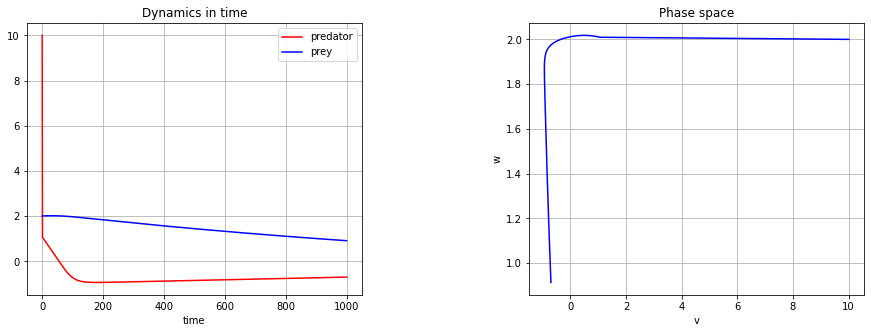

In [9]:
#plot
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(v, 'r-', label='predator')
ax1.plot(w, 'b-', label='prey')
#ax1.plot(z, 'g-', label='prey')
ax1.set_title("Dynamics in time")
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(v, w, color="blue")
ax2.set_xlabel("v")
ax2.set_ylabel("w")  
ax2.set_title("Phase space")
ax2.grid()

In [6]:
# brute force: iterate through possibility space (r)
fp = []

def find_fixed_points(r):
    for v in range(r):
        for w in range(r):
            if ((f(v,w) == 0) and (g(v,w) == 0)):
                fp.append((v,w))
                print('The system has a fixed point in %s,%s' % (v,w))
    return fp

find_fixed_points(10)

The system has a fixed point in 0,0


[(0, 0)]

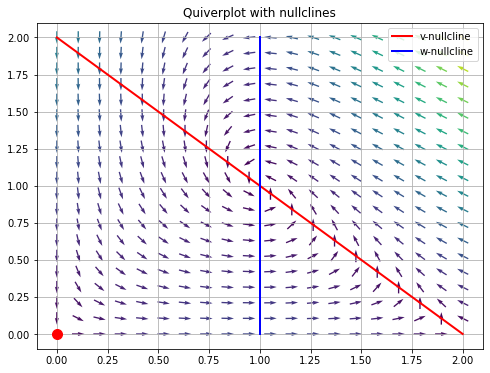

In [10]:
# define system in terms of a Numpy array
def Sys(X, t=0):
    # here X[0] = v and x[1] = w    
    return np.array([ 2*X[0] - X[0]**2 - X[0]*X[1] , - X[1] + X[0]*X[1] ])

#plot
fig2 = plt.figure(figsize=(8,6))
ax4 = fig2.add_subplot(1,1,1)

v = np.linspace(0,2,20)
w = np.arange(0,2,20)

# plot nullclines
ax4.plot([0,2],[2,0], 'r-', lw=2, label='v-nullcline')
ax4.plot([1,1],[0,2], 'b-', lw=2, label='w-nullcline')

# plot fixed points
for point in fp:
    ax4.plot(point[0],point[1],"red", marker = "o", markersize = 10.0)
ax4.set_title("Quiverplot with nullclines")
ax4.legend(loc='best')

# quiverplot
# define a grid and compute direction at each point
v = np.linspace(0, 2, 20)
w = np.linspace(0, 2, 20)

X1 , Y1  = np.meshgrid(v, w)                    # create a grid
DX1, DY1 = Sys([X1, Y1])                        # compute growth rate on the grid
M = (np.hypot(DX1, DY1))                        # norm growth rate 
M[ M == 0] = 1.                                 # avoid zero division errors 
DX1 /= M                                        # normalize each arrows
DY1 /= M

ax4.quiver(X1, Y1, DX1, DY1, M, pivot='mid')
ax4.legend()
ax4.grid()

In [13]:
# needed to calculate (complex) squareroots of negative numbers
from cmath import sqrt

def eigenvalues(v,w):
    # I + v*(1-v)*(v-a)-w
    a11 = -3*v**2+2.2*v-.1          # differentiated with respect to v
    a12 = -1                       # differentiated with respect to w
    # eps*(v-gamma*w)
    a21 = .1                         # differentiated with respect to v
    a22 = -.025                   # differentiated with respect to w

    tr = a11 + a22
    det = a11*a22 - a12*a21
    lambda1 = (tr - sqrt(tr**2 - 4*det))/2
    lambda2 = (tr + sqrt(tr**2 - 4*det))/2
    print('Check the fixed point  %s, %s' % (v,w)) 
    print('The real part of the first eigenvalue is %s' %lambda1.real)
    print('The real part of the second eigenvalue is %s' % lambda2.real)    
    
    if (lambda1.real < 0 and lambda2.real < 0):
        print('The fixed point in %s, %s is a sink. It is stable' % (v,w))
    if (lambda1.real > 0 and lambda2.real > 0):
        print('The fixed point in %s, %s is a source. It is unstable' % (v,w))
    if (lambda1.real > 0 and lambda2.real < 0):
        print('The fixed point in %s, %s is a saddle. It is unstable' % (v,w))
    if (lambda1.real < 0 and lambda2.real > 0):
        print('The fixed point in %s, %s is unstable' % (x,y))
    print('----------------------------')
    return lambda1 , lambda2

# iterate through list of fixed points
for v,w in fp:
    eigenvalues(v,w)   

Check the fixed point  0, 0
The real part of the first eigenvalue is -0.0625
The real part of the second eigenvalue is -0.0625
The fixed point in 0, 0 is a sink. It is stable
----------------------------
